<a href="https://colab.research.google.com/github/ehsanh123/CNN-tutorial-DeepLearning/blob/main/DeepLearning_week6_Cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Cifar Dataset

from keras.datasets import cifar10

#np_utils for one hot encoding

from tensorflow.keras.utils import to_categorical  # Updated import

#Sequential model for FC layers

from keras.models import Sequential

#Core layers

from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

#import 2D convolution and max pooling 2d layer

from tensorflow.keras.layers import Conv2D, MaxPooling2D

#Import Gradien descent optimize

from keras.optimizers import SGD

#Plotting images

import matplotlib.pyplot as plt

In [ ]:
# Cifar is a set of 60000 images of 32 by 32 pixel on 3 rgb channe

image_channels = 3

image_rows = 32

image_coloumns = 32

In [ ]:
# Network settings

BATCH_SIZE = 128

N_EPOCHS = 20

N_CLASSES = 10

VERBOSE = 1

#Pareto Principles 80/20

VALIDATE_SPLIT=0.2

#To optimise

OPTIMISER = SGD()

In [ ]:
4

## Loading the dataset

(X_train, y_train), (x_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


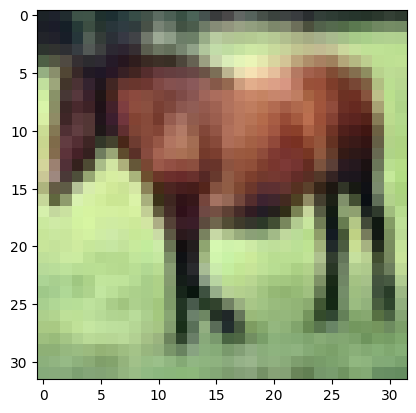

In [ ]:
x_train = X_train
plt.imshow(x_train[7])

plt.show()


In [ ]:
# One hot encoing
X_test = x_test
Y_train = to_categorical(y_train, N_CLASSES)

Y_test = to_categorical(y_test, N_CLASSES)

# Normalisation

X_train = X_train.astype('float32')

X_test = X_test.astype('float32')

X_train /= 255

X_test /= 255

In [ ]:
# Network object
model = Sequential()
#32 convolutional filters, each filter of 3 by 3 size
#The out put dimension is the same as the input shape
#Image dimention 32 X 32 X 3
#Try to padd evenly

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(image_rows, image_coloumns,image_channels)))
#Activation Function ReLU

model.add(Activation('relu'))

#A Max pooling layer of the size 2x2

model.add(MaxPooling2D(pool_size=(2, 2)))

# A dropout layer of 25% to prevent overfitting

model.add(Dropout(0.25))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#FC Layer

model.add(Flatten())

model.add(Dense(512))

model.add(Activation('relu'))

#Dropout 0.5

model.add(Dropout(0.5))

#The output layer has ten classes.

model.add(Dense(N_CLASSES))

model.add(Activation('softmax'))

#Print the model summary

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,200,842 (16.02 MB)

 Trainable params: 4,200,842 (16.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile model

model.compile(loss='categorical_crossentropy', optimizer=OPTIMISER, metrics=['accuracy'])

#Fit the model and start trtaining

model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCHS, validation_split=VALIDATE_SPLIT, verbose=VERBOSE) #=

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.1621 - loss: 2.2394 - val_accuracy: 0.3274 - val_loss: 1.9765
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2850 - loss: 1.9881 - val_accuracy: 0.3505 - val_loss: 1.8724
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3267 - loss: 1.8903 - val_accuracy: 0.3761 - val_loss: 1.7889
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3559 - loss: 1.8150 - val_accuracy: 0.4003 - val_loss: 1.7277
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3814 - loss: 1.7484 - val_accuracy: 0.4160 - val_loss: 1.6750
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4008 - loss: 1.7001 - val_accuracy: 0.4344 - val_loss: 1.6207
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4188 - loss: 1.6444 - val_accuracy: 0.4550 - val_loss: 1.5683
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4295 - loss: 1.6053 - val_accuracy: 

In [ ]:
#Evaluate the model and start training

score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)

print("Test score:", score[0])

print('Test accuracy:', score[1])

#save model

model_json = model.to_json()

#Save the model architecture

open('cifar10_architecture.json', 'w').write(model_json)

#Save the model weights.

model.save_weights('cifar10_weights.weights.h5', overwrite=True) # Changed filename to include '.weights.h5'

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5565 - loss: 1.2549
Test score: 1.259320616722107
Test accuracy: 0.557200014591217


In [ ]:
# Your turn

# • Change the hyper-parameters (epochs, add layers of Fully connected.)

# • Change the kernel size to 2x3 and 4x4

# • Change the pooling to 3x3

# • Modify the dropout and see if the model improves.

# • Visualise the accuracy results